pip install --force-reinstall tensorflow

# SOMMAIRE

### Introduction

L'objectif de ce projet est d'entrainer un CNN capable de classer les images en fonction de la race du chien présent sur l'image, en utilisant notamment du Transfert Learning.  
Le dataset utilisé est le [Stanford Dogs Dataset](http://vision.stanford.edu/aditya86/ImageNetDogs/) .


1. [Imports et chemins](#-1.-Imports-et-chemins)
2. [Observation des données](#-2.-Observation-des-données)
3. [Preprocessing](#-3.-Preprocessing)
4. [Modèles CNN](#-4.-Modèles-CNN)
5. [Transfer Learning](#-5.-Transfer-Learning)

## 1. Imports et chemins

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random

# Observation
from wordcloud import WordCloud

# Preprocessing
import cv2
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
PATH_INPUT = "/Users/alexandremonod/Python/OC_ML/projet_6_classer_des_images/input"
PATH_OUTPUT = "/Users/alexandremonod/Python/OC_ML/projet_6_classer_des_images/output"
PATH_FIGURES = "/Users/alexandremonod/Python/OC_ML/projet_6_classer_des_images/output/figures"

In [3]:
# Unix : Il ne faut pas prendre en compte les fichiers cachés
list_breeds = [f for f in os.listdir(PATH_INPUT + "/Images") if not f.startswith('.')]

## 2. Observation des données

In [4]:
print(f"Nb de catégories/d'espèces de chiens :", len(list_breeds))

Nb de catégories/d'espèces de chiens : 120


In [5]:
# Production d'un df
 
df = pd.DataFrame(list_breeds, columns=['Id_name_breed'])
df['breed_name']=df['Id_name_breed'].apply(lambda x: x.split('-')[1])
df['Id']=df['Id_name_breed'].apply(lambda x: x.split('-')[0])

nb_pic=[]
for name in df.Id_name_breed:
   nb_pic.append(len(os.listdir(f"{PATH_INPUT}//Images" + "/" + name)))

df['nb_pic']=nb_pic

print("Nb total d'images:", df["nb_pic"].sum())

Nb total d'images: 20580


In [6]:
df.head(3)

Id_name_breed                breed_name         Id  \
0             n02097658-silky_terrier             silky_terrier  n02097658   
1        n02092002-Scottish_deerhound        Scottish_deerhound  n02092002   
2  n02099849-Chesapeake_Bay_retriever  Chesapeake_Bay_retriever  n02099849   

   nb_pic  
0     183  
1     232  
2     167

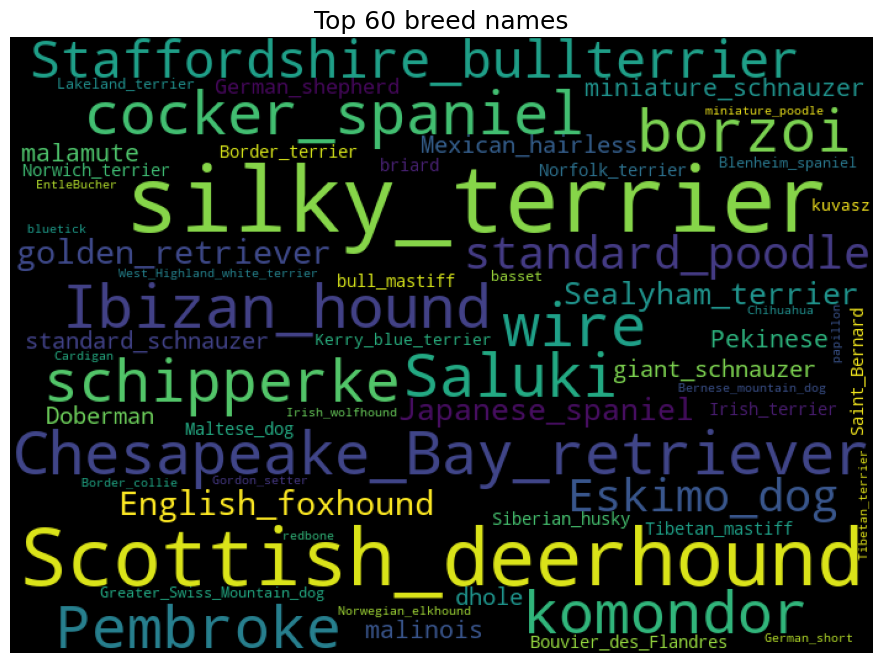

In [7]:
fig = plt.figure(1, figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)
wordcloud = WordCloud(width=700, height=500,
                      background_color="black",max_words=60, relative_scaling=1,
                      normalize_plurals=False).generate(" ".join(df.breed_name))

ax.imshow(wordcloud)
ax.axis("off")
plt.title("Top 60 breed names", fontsize=18)
plt.show()

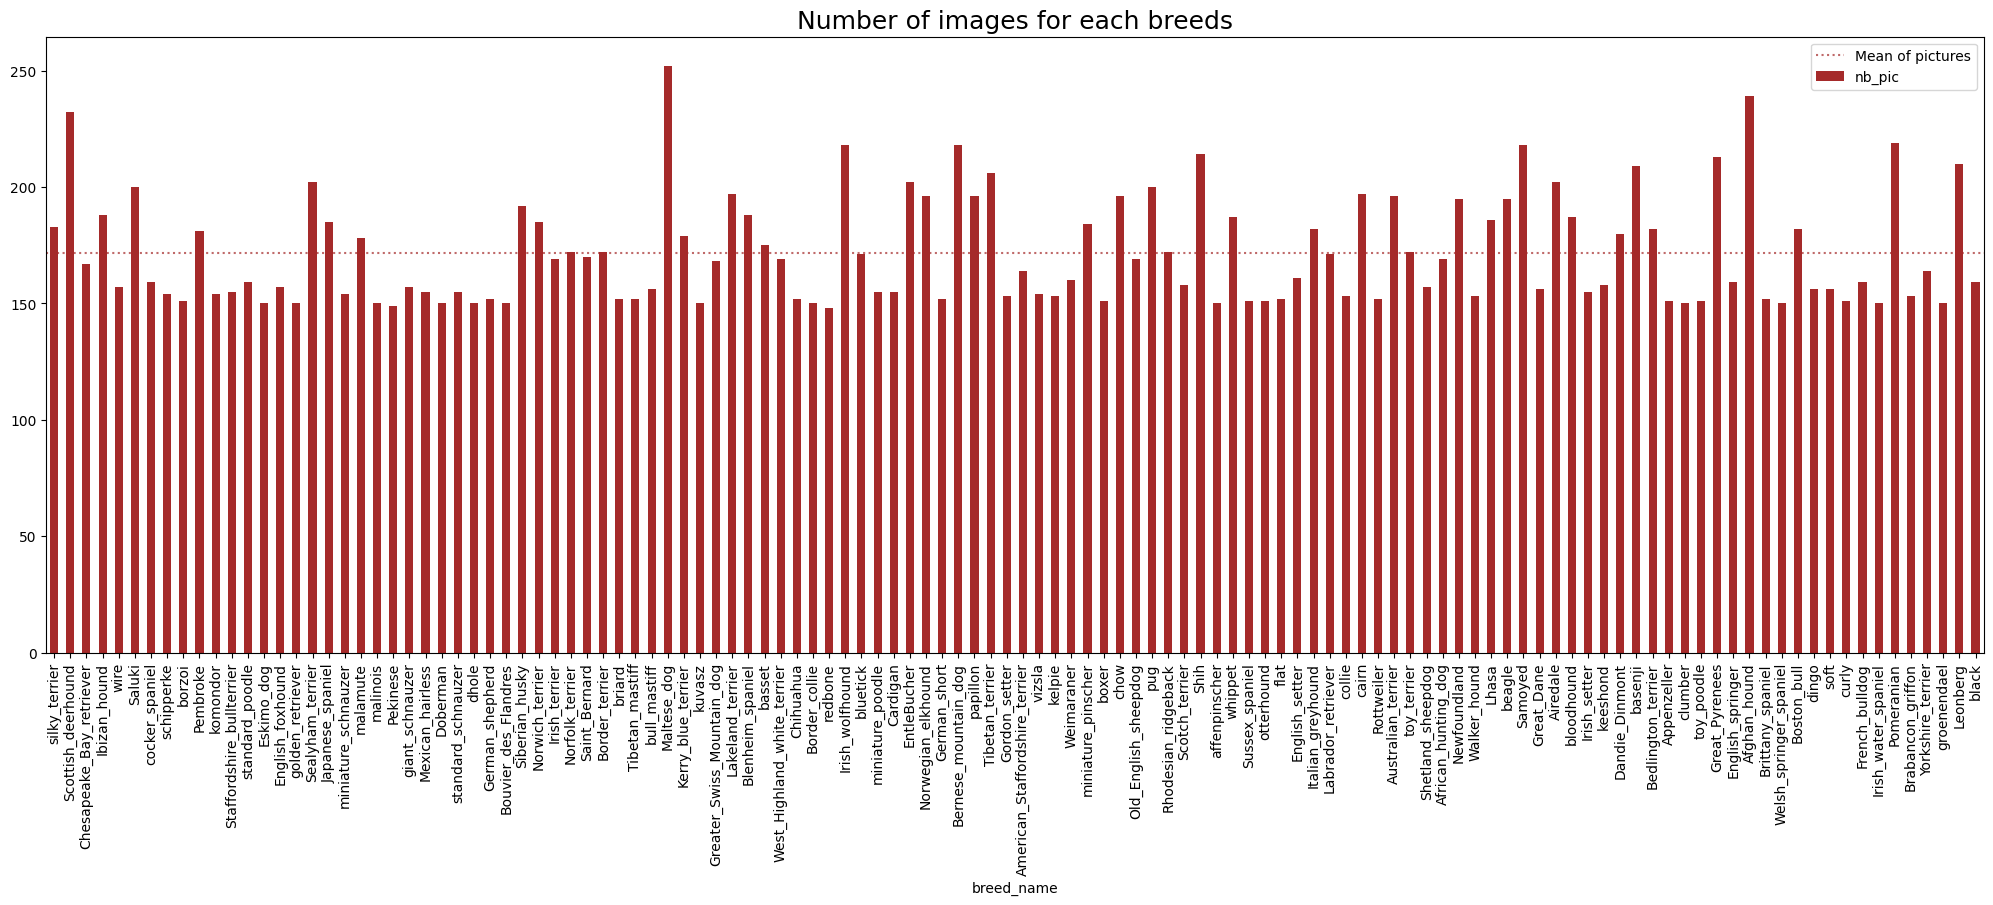

Le nb moyen d'images par classe est de 171.5
Le nb d'images par classe varie entre 148 et 252


In [8]:
fig, ax = plt.subplots(1, 1, figsize=(25,8))
df.plot(x='breed_name',kind="bar", color='brown',legend=False,ax=ax)
ax.axhline(df["nb_pic"].mean(),
           color='brown', alpha=.7,
           linestyle=':',
           label="Mean of pictures")
plt.title("Number of images for each breeds",
          color='k', fontsize=18)
plt.legend()
plt.show()

print("Le nb moyen d'images par classe est de", df["nb_pic"].mean())
print("Le nb d'images par classe varie entre", df["nb_pic"].min(), "et", df["nb_pic"].max())

In [9]:
import matplotlib.image as mpimg

In [10]:
#list of directories 
path_list=[]
for classe in df['Id_name_breed'].values:
    images = os.listdir(f"{PATH_INPUT}//Images" + "/" + classe)
    for i in range(len(images)):
        path_list.append(f"{PATH_INPUT}//Images"+"/"+ classe +"/"+images[i])
        
#list of images shape        
ds_img=[]
for path in path_list:
    ds_img.append(mpimg.imread(path).shape)

#data frame of results    
ds_img = pd.DataFrame(ds_img, index = path_list,columns=['heigth','width','color'])
#list of breed which corespoonds to each path      
y=[]
for j in range(len(list_breeds)):
   for k in range(df.nb_pic.values[j]):
      y.append(df.breed_name.values[j])
ds_img['breed_name']=y

In [11]:
ds_img.sample(10)

heigth  width  color  \
/Users/alexandremonod/Python/OC_ML/projet_6_cla...     288    216      3   
/Users/alexandremonod/Python/OC_ML/projet_6_cla...     319    500      3   
/Users/alexandremonod/Python/OC_ML/projet_6_cla...     375    500      3   
/Users/alexandremonod/Python/OC_ML/projet_6_cla...     500    334      3   
/Users/alexandremonod/Python/OC_ML/projet_6_cla...     389    275      3   
/Users/alexandremonod/Python/OC_ML/projet_6_cla...     375    500      3   
/Users/alexandremonod/Python/OC_ML/projet_6_cla...     397    441      3   
/Users/alexandremonod/Python/OC_ML/projet_6_cla...     280    200      3   
/Users/alexandremonod/Python/OC_ML/projet_6_cla...     500    375      3   
/Users/alexandremonod/Python/OC_ML/projet_6_cla...     335    500      3   

                                                                        breed_name  
/Users/alexandremonod/Python/OC_ML/projet_6_cla...                Japanese_spaniel  
/Users/alexandremonod/Python/OC_ML/projet_6_cla...                        papillon  
/Users/alexandremonod/Python/OC_ML/projet_6_cla...                   Saint_Bernard  
/Users/alexandremonod/Python/OC_ML/projet_6_cla...                         redbone  
/Users/alexandremonod/Python/OC_ML/projet_6_cla...                           black  
/Users/alexandremonod/Python/OC_ML/projet_6_cla...              Labrador_retriever  
/Users/alexandremonod/Python/OC_ML/projet_6_cla...                Japanese_spaniel  
/Users/alexandremonod/Python/OC_ML/projet_6_cla...      Greater_Swiss_Mountain_dog  
/Users/alexandremonod/Python/OC_ML/projet_6_cla...                     toy_terrier  
/Users/alexandremonod/Python/OC_ML/projet_6_cla...  American_Staffordshire_terrier

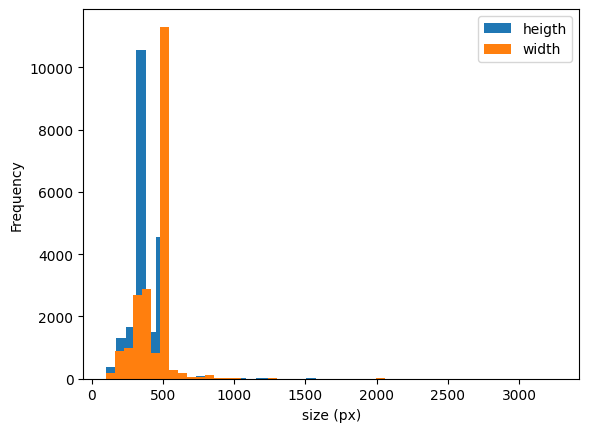

Larguer et hauteur moyennes par image :  (385.86, 442.53)


In [12]:
ds_img['heigth'].plot.hist(bins=35, alpha=1)
ds_img['width'].plot.hist(bins=50, alpha=1)
plt.xlabel('size (px)')
plt.legend(['heigth','width'])
plt.show()
print("Larguer et hauteur moyennes par image : ", (round(ds_img['heigth'].mean(),2),round(ds_img['width'].mean(),2)))

In [13]:
ds_img['color'].value_counts().values[0]

20579

In [14]:
# Obtenir les fréquences des couleurs dans le DataFrame
color_counts = ds_img['color'].value_counts().reset_index()
color_counts.columns = ['Couleur', 'Fréquence']

# Trier les couleurs par ordre décroissant de fréquence
color_counts = color_counts.sort_values(by='Fréquence', ascending=False)

print("Fréquence des couleurs dans le dataset :")
print(color_counts)

Fréquence des couleurs dans le dataset :
   Couleur  Fréquence
0        3      20579
1        4          1


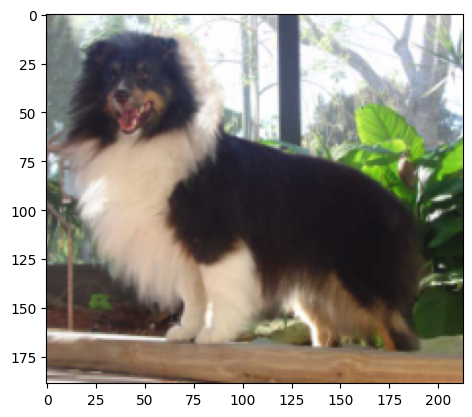

In [15]:
image_color_4 = ds_img[ds_img.color==4].index[0]
img4 = mpimg.imread(image_color_4)
plt.imshow(img4)

L'indice de couleur exprime en fait le niveau de transparence de l'image. Une seule est à 4, on remarque que c'est une image avec une transparence forte dans la partie supérieure droite.

(-0.5, 499.5, 374.5, -0.5)

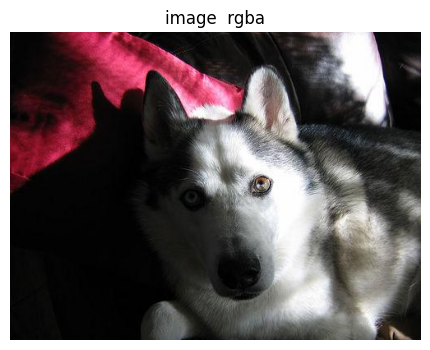

In [16]:
#Affichage d'une image au hasard
plt.fig = plt.figure(figsize=(10,4))
idx = ds_img[ds_img.color==3].index[random.randint(0,len(ds_img[ds_img.color==3]))]
img4 = mpimg.imread(idx)
plt.imshow(img4)
plt.title("image  rgba")
plt.axis('off')

Regardons quelques exemples des images par races disponibles dans notre base d'étude :

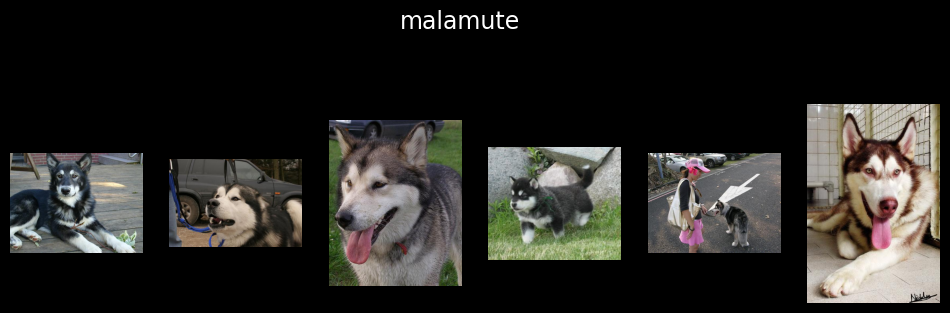

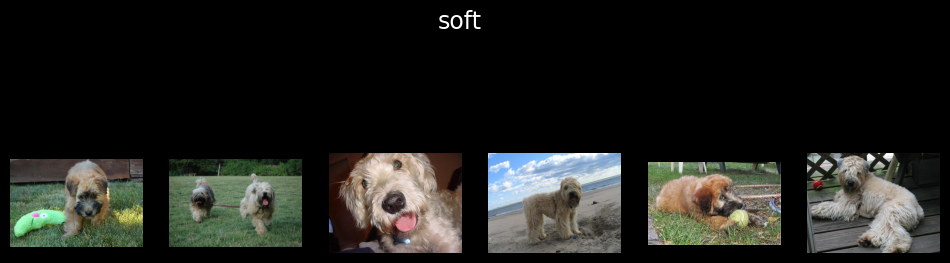

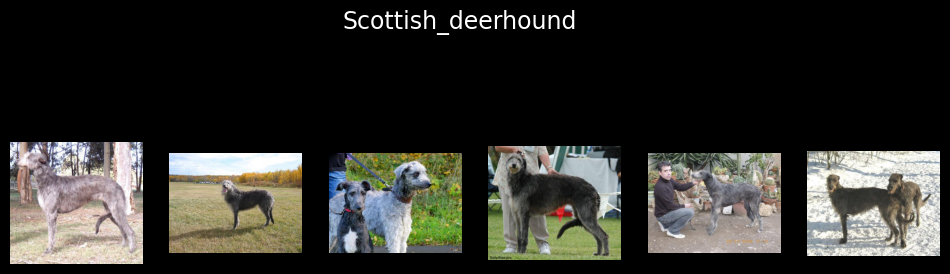

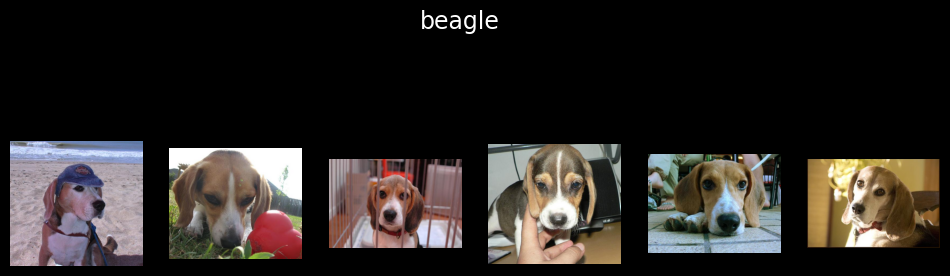

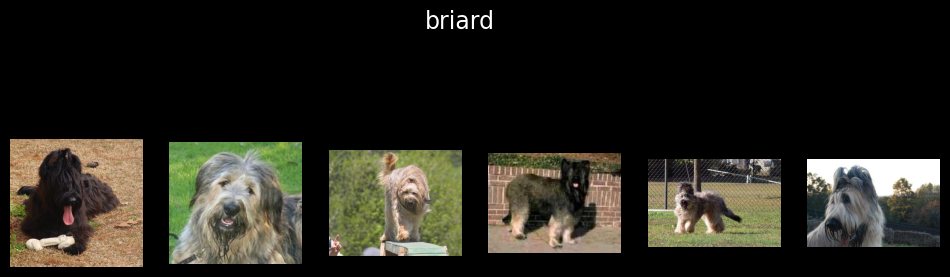

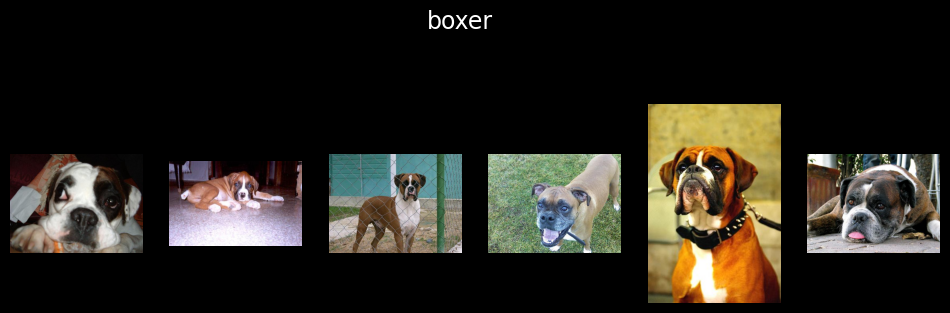

In [17]:
plt.style.use('dark_background')

Num = 6
breed_id_sample = np.random.choice(df['Id_name_breed'].values,Num)
for classe in breed_id_sample:
   images = os.listdir(f"{PATH_INPUT}//Images" + "/" + classe)[:Num]
   fig = plt.figure(figsize=(12,4))
   plt.suptitle("{}".format(classe.split("-")[1]), color="w", fontsize=17) 
   for i in range(Num):
        img = mpimg.imread(f"{PATH_INPUT}//Images"+"/"+ classe +"/"+images[i])
        plt.subplot(1, Num, i+1)
        plt.imshow(img)
        plt.axis('off')  
   plt.show()

La dimension des images n'est pas uniforme ; or le modèle CNN exige une taille unique pour toutes les données. Il faut donc redimensionner les images à une dimension unique. Nous choisissons la dimenstion standard 300*300.

Nous allons ainsi effectuer un ensemble de transformation sur notre base des images. Notamment, la redimensinnement, l'égalisation, le débruitage et le blanchiment.

## 3. Preprocessing

### 1.2.1 Egalisation d'histogramme

Il s'agit de mieux répartir l'intensité lumineuse dans l'ensemble de l'image : les images ternes seront éclairées, les images claires seront assombries.  Cela revient à égaliser un histogramme.  
  
![Histogramme](https://docs.opencv.org/4.x/histogram_equalization.png)  
  
Pour des images couleur, il faut procéder couleur par couleur : red, green, puis blue.

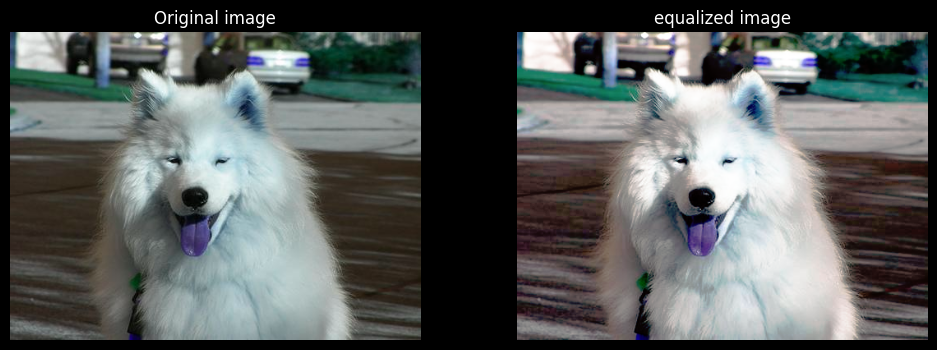

In [18]:
random_path = ds_img.index[np.random.randint(len(ds_img))]
image = cv2.imread(random_path)

# Equalization
r_image, g_image, b_image = cv2.split(image)
r_image_eq = cv2.equalizeHist(r_image)
g_image_eq = cv2.equalizeHist(g_image)
b_image_eq = cv2.equalizeHist(b_image)
image_eq = cv2.merge((r_image_eq, g_image_eq, b_image_eq))
cmap_val = None

# Show both images
fig = plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.axis('off') 
plt.imshow(image)
plt.title("Original image")
plt.subplot(1, 2, 2)
plt.axis('off') 
plt.imshow(image_eq)
plt.title("equalized image")
plt.show()           

### 1.2.2 Débruitage de l'image

Une image peut être "bruitée", c-à-d avoir des pixels indésirables, du grain, en raison de la mauvaise qualité de l'appareil ou de conditions climatiques défavorables.  
Pour débruiter, OpenCV calcule les moyennes de blocs de pixels similaires (blocs avec les mêmes variations de couleur, les mêmes motifs...) et corrgie ensuite chaque bloc individuel. Cela homogénéise, enlève les détails spécifiques de chaque bloc mais limite aussi les "erreurs" du bruit.

Pour la méthode "fastNlMeansDenoisingColored", j'utilise des paramètres par défaut, retrouvés dans différentes explications sur le sujet, notamment sur la documentation [https://docs.opencv.org/4.x/d1/d79/group__photo__denoise.html].

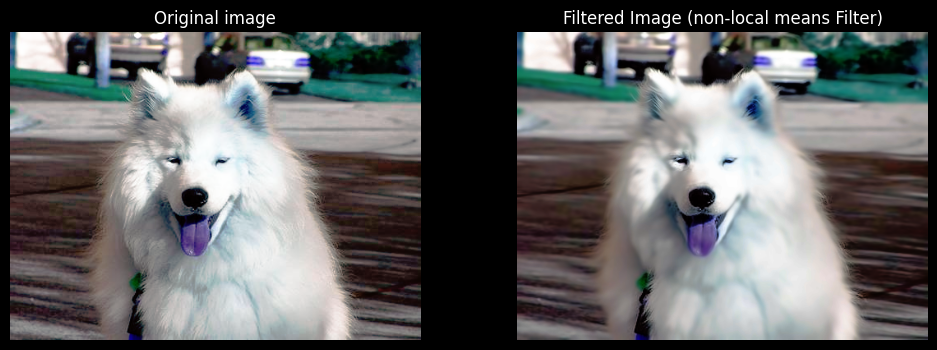

In [19]:
# Apply non-local means filter on test img
img_nlf = cv2.fastNlMeansDenoisingColored(image_eq,None,10,10,21,7)
# Show both img
fig = plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.axis('off') 
plt.imshow(image_eq)
plt.title("Original image")
plt.subplot(1, 2, 2)
plt.axis('off') 
plt.imshow(img_nlf)
plt.title("Filtered Image (non-local means Filter)")
plt.show()

13/10 Test changment 21 7 --> 7 21

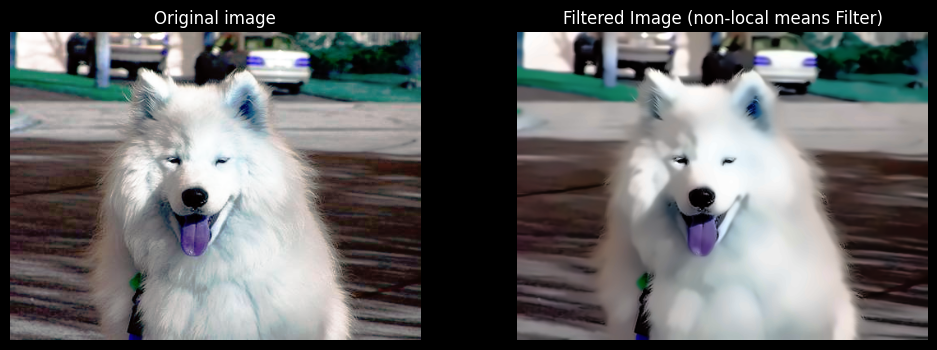

In [72]:
# Apply non-local means filter on test img
img_nlf = cv2.fastNlMeansDenoisingColored(image_eq,None,10,10,7,21)
# Show both img
fig = plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.axis('off') 
plt.imshow(image_eq)
plt.title("Original image")
plt.subplot(1, 2, 2)
plt.axis('off') 
plt.imshow(img_nlf)
plt.title("Filtered Image (non-local means Filter)")
plt.show()

### 1.2.3 Whitening

Le but du whitening est de supprimer la corrélation entre les pixels.  
Le whitening, contrairement à ce que son nom indique, n'aboutit pas forcément à une image en noir et blanc.

Le processus de whitening peut être résumé comme suit :

Calcul de la matrice de covariance : Tout d'abord, on calcule la matrice de covariance à partir des données d'entrée. La matrice de covariance représente les relations statistiques entre les différentes caractéristiques de l'ensemble de données.

Décomposition en valeurs propres et vecteurs propres : Ensuite, on effectue une décomposition en valeurs propres et vecteurs propres de la matrice de covariance. Cela permet de déterminer les directions principales (vecteurs propres) le long desquelles les données sont les plus étendues et les valeurs propres indiquent les variances associées à ces directions.

Normalisation des vecteurs propres : Les vecteurs propres sont normalisés pour avoir une longueur unitaire, ce qui permet d'obtenir une base orthonormée.

Réduction de la corrélation : Les données d'entrée sont projetées sur cette nouvelle base orthonormée, ce qui les rend décorrélées. Cela signifie que les nouvelles caractéristiques sont statistiquement indépendantes les unes des autres.

Ajustement de l'échelle : Enfin, les caractéristiques sont ajustées en échelle pour avoir une variance unitaire, ce qui est également appelé mise à l'échelle unitaire.

In [20]:
# Test ChatGPT

In [73]:
def whitening(image):
    # Convert the image to floating-point type and normalize to [0, 1]
    image = image.astype(np.float32) / 255.0

    # Calculate the covariance matrix of the image channels
    cov_matrix = np.cov(image.reshape(-1, 3), rowvar=False)

    # Perform the eigendecomposition of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # Sort eigenvectors in decreasing order of eigenvalues
    order = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, order]

    # Whitening transformation: Xwhitened = (X - mean) * V * D^(-1/2)
    mean = np.mean(image, axis=(0, 1))
    whitened_image = np.dot(image - mean, eigenvectors) / np.sqrt(eigenvalues + 1e-5)

    # Scale the whitened image to the range [0, 255]
    whitened_image = (whitened_image - np.min(whitened_image)) / (np.max(whitened_image) - np.min(whitened_image))
    whitened_image = (whitened_image * 255).astype(np.uint8)

    return whitened_image

In [74]:
def whitening2(image):
    # Convert the image to floating-point type and normalize to [0, 1]
    image = image.astype(np.float32) / 255.0

    # Calculate the covariance matrix of the image channels
    cov_matrix = np.cov(image.reshape(-1, 3), rowvar=False)

    # Perform the eigendecomposition of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # Sort eigenvectors in decreasing order of eigenvalues
    order = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, order]

    # Whitening transformation: Xwhitened = (X - mean) * V * D^(-1/2)
    mean = np.mean(image, axis=(0, 1))
    whitened_image = np.dot(image - mean, eigenvectors) / np.sqrt(eigenvalues + 1e-1)

    # Scale the whitened image to the range [0, 255]
    whitened_image = (whitened_image - np.min(whitened_image)) / (np.max(whitened_image) - np.min(whitened_image))
    whitened_image = (whitened_image * 255).astype(np.uint8)

    return whitened_image

In [90]:
def whitening3(image, eps):
    """Fonction qui calcule la transformation de blanchiment ZCA d'une image couleur
    --------------------
    param :
    image : image à traiter
    eps : seuil de blanchiment <1
    """

    # Suppression de la moyenne de chaque pixel
    image_c = image - image.mean(axis=0)

    # Séparation de l'image_c en 3 canaux de couleur
    r_image, g_image, b_image = cv2.split(image_c)

    # Calcul de la matrice de covariance des données centrées
    cov_r = np.cov(r_image, rowvar=False, bias=True)
    cov_g = np.cov(g_image, rowvar=False, bias=True)
    cov_b = np.cov(b_image, rowvar=False, bias=True)

    # Calcul de la décomposition en valeurs singulières (SVD) des matrices de covariance
    U_r, S_r, V_r = np.linalg.svd(cov_r)
    U_g, S_g, V_g = np.linalg.svd(cov_g)
    U_b, S_b, V_b = np.linalg.svd(cov_b)

    # Transformation de whitening en utilisant ZCA (Zero Component Analysis)
    r_img_zca = U_r.dot(np.diag(1.0 / np.sqrt(S_r + eps))).dot(U_r.T).dot(r_image.T).T
    g_img_zca = U_g.dot(np.diag(1.0 / np.sqrt(S_g + eps))).dot(U_g.T).dot(g_image.T).T
    b_img_zca = U_b.dot(np.diag(1.0 / np.sqrt(S_b + eps))).dot(U_b.T).dot(b_image.T).T

    # Recomposition de l'image
    img_zca = cv2.merge((r_img_zca, g_img_zca, b_img_zca)) + image.mean(axis=0) / 255

    return img_zca

In [75]:
random_path2 = ds_img.index[np.random.randint(len(ds_img))]
image2 = cv2.imread(random_path)

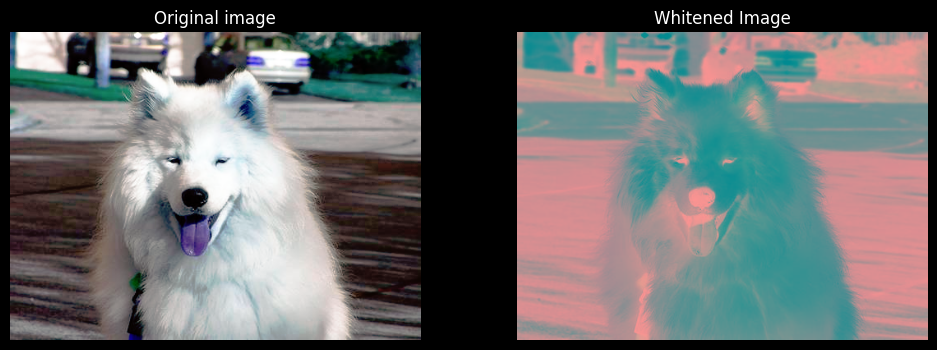

In [76]:
fig = plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.axis('off') 
plt.imshow(image_eq)
plt.title("Original image")
plt.subplot(1, 2, 2)
plt.axis('off') 
plt.imshow(whitening(image2),cmap='Greys')
plt.title("Whitened Image")
plt.show()

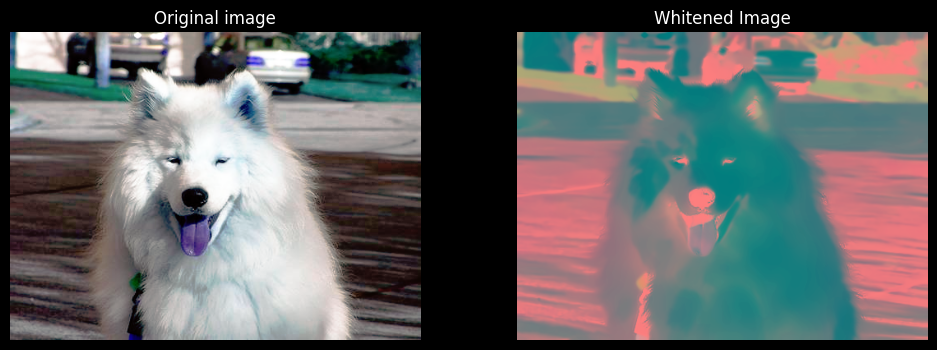

In [77]:
whitened_image = whitening2(img_nlf)
# Show both img
fig = plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.axis('off') 
plt.imshow(image_eq)
plt.title("Original image")
plt.subplot(1, 2, 2)
plt.axis('off') 
plt.imshow(whitened_image,cmap='Greys')
plt.title("Whitened Image")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


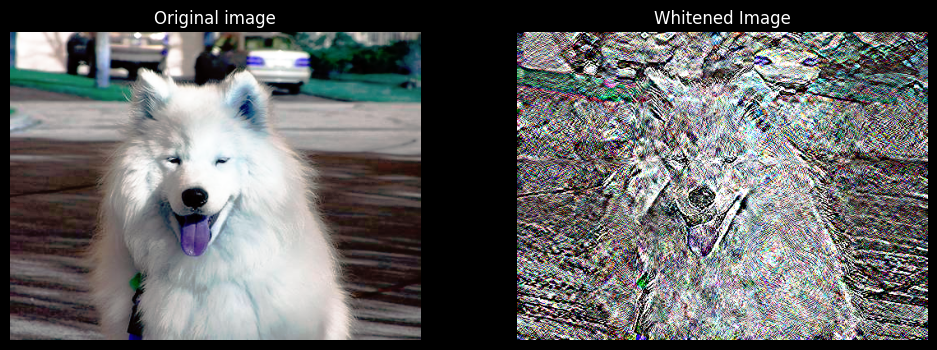

In [92]:
whitened_image = whitening3(img_nlf, 0.01)
# Show both img
fig = plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.axis('off') 
plt.imshow(image_eq)
plt.title("Original image")
plt.subplot(1, 2, 2)
plt.axis('off') 
plt.imshow(whitened_image,cmap='Greys')
plt.title("Whitened Image")
plt.show()

Whitening : utile pour mfaire des limites saillantes dans l'image

### 1.2.4 Augmentation de données

L'objectif est de produire de nouvelles images depuis des images existantes afiin d'augmenter la base de données.  
Il s'agit d'appliquer des transformations géométriques aléatoires : translations, rotations, mirroring, ...

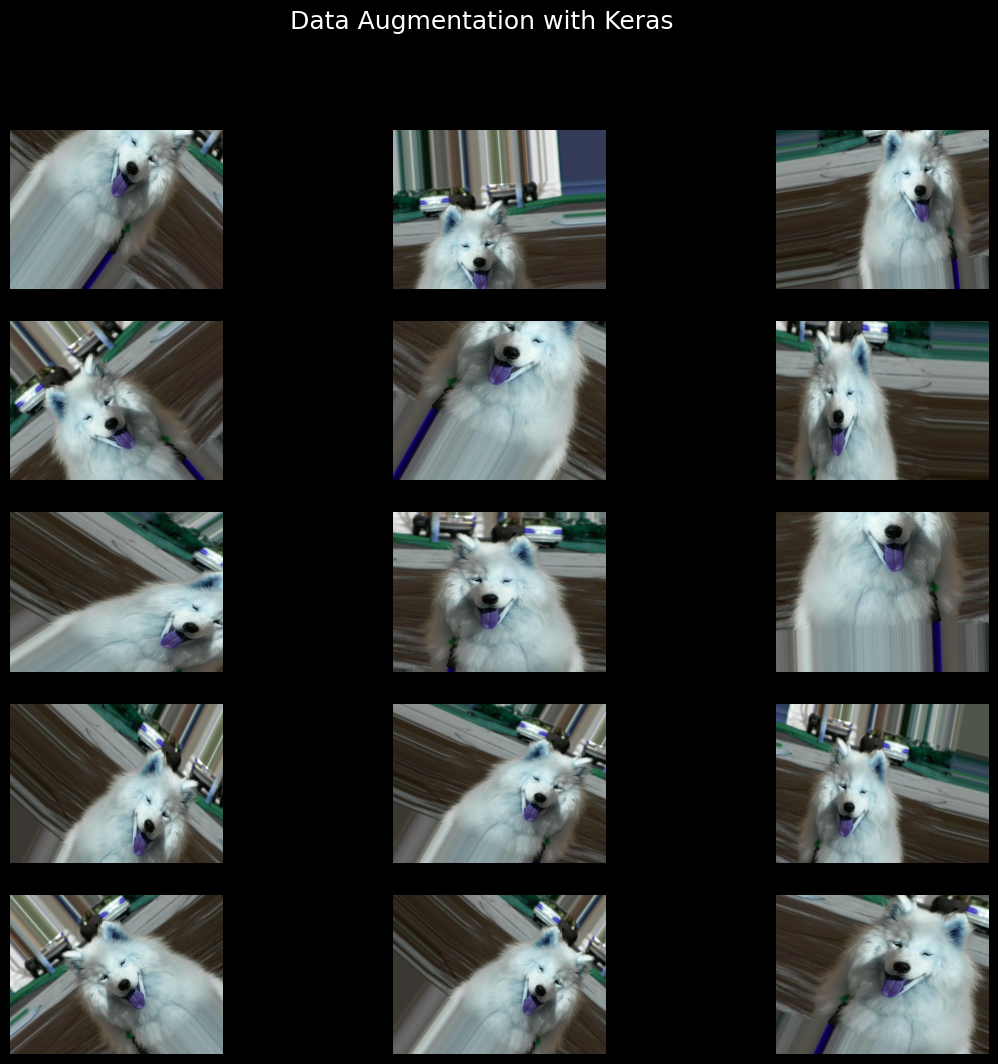

In [78]:
# Création du générateur d'images
datagen = ImageDataGenerator(
        rotation_range=50,
        width_shift_range=0.25,
        height_shift_range=0.25,
        rescale=1./255,
        shear_range=0.25,
        zoom_range=0.25,
        horizontal_flip=True,
        fill_mode='nearest')

# Convert an image to array
x = image.reshape((1,) + image.shape)

# Generate batches of augmented images from `x`
fig = plt.figure(figsize=(14,12))
for i, batch in enumerate(datagen.flow(x, batch_size=1)):

    # We only want the first 15 batches, so break the loop after that
    if i == 15:
        break

    # Get the subplot for the current batch and display it
    ax = fig.add_subplot(5, 3, i+1)
    ax.imshow(tf.keras.preprocessing.image.array_to_img(batch[0]))

    plt.axis('off') 


plt.suptitle("Data Augmentation with Keras", fontsize=18)
plt.show()

## 4. Modèles CNN

Plusieurs paramètres doivent être définis pour entrainer un modèle CNN : 
- __le type de fonction d'activation__ : elle introduit de la non-linéarité dans le modèle et détermine l'output d'un neurone dans le réseau
- __l'algorithme d'optimisation__ : méthode utilisée pour ajuster les poids du réseau afin de minimiser la fonction de coût
- __le nb de filtres__ (sur la couche de convolution)/nb de kernel : chaque filtre est capable de détecter une caractéristique spécifique dans l'image (par exemple, les bords, les couleurs, etc.). Un nombre plus élevé de filtres permet au réseau d'apprendre une plus grande variété de caractéristiques, mais augmente également la complexité du modèle.
- __le Wind__ : taille de la fenêtre d'entrée sur laquelle le filtre de convolution est appliqué. Par exemple, une taille de fenêtre de 3 signifie que le filtre est appliqué sur des carrés de 3x3 pixels à la fois. La taille de la fenêtre influence le niveau de détail que le réseau peut apprendre : une taille de fenêtre plus petite permet de capturer des détails fins, tandis qu'une taille plus grande permet de capturer des caractéristiques plus globales.
- __le nb d'Epochs__ : nb de fois l'ensemble du jeu de données est passé au travers du réseau neuronal

Il va falloir déterminer quels sont les paramètres les plus performants dans notre cas.

Les mesures classiques d'évaluation d'un modèle CNN sont :
- __Accuracy__ : indique la performance du modèle à travers la proportion d'observations correctement classées par rapport à toutes les observations
- __Loss__ : mesure la manière dont le modèle s'ajuste aux données. Une perte élevée indique un surajustement, une perte faible est bon signe.

### Train-test sur 5 races

In [79]:
NB_BREEDS = 5

In [80]:
def preprocessing(uri_list,input_shape):
    """Preprocessing of images for convolutional neural network.
    Equalization, Denoising and transformation of the image into Array. 
    ------------------
    param:
    uri_list: 
    list of images directories
    input_shape: 
    (width, heigth) size of the image  for target resizing
    """
    img_list=[]
    for uri in uri_list:
            # Read image
            image = cv2.imread(uri)
            # Resize image
            image = cv2.resize(image, input_shape)
            # Equalization
            r_image, g_image, b_image = cv2.split(image)
            r_image_eq = cv2.equalizeHist(r_image)
            g_image_eq = cv2.equalizeHist(g_image)
            b_image_eq = cv2.equalizeHist(b_image)
            image_eq = cv2.merge((r_image_eq, g_image_eq, b_image_eq))
            # Apply non-local means filter 
            img_nlf = cv2.fastNlMeansDenoisingColored(image_eq,None,10,10,7,21)
            img_nlf = whitening(img_nlf)
            # Append lists of labels and image
            img_list.append(img_nlf)
            #labels = ds_img.bread_name[0:tot_nb_img]
        
  
    return np.array(img_list)

In [81]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [82]:
# Test Daouda avec chgt seuil du whitening
def preprocessing2(uri_list,input_shape):
    """Preprocessing of images for convolutional neural network.
    Equalization, Denoising and transformation of the image into Array. 
    ------------------
    param:
    uri_list: 
    list of images directories
    input_shape: 
    (width, heigth) size of the image  for target resizing
    """
    img_list=[]
    for uri in uri_list:
            # Read image
            image = cv2.imread(uri)
            # Resize image
            image = cv2.resize(image, input_shape)
            # Equalization
            r_image, g_image, b_image = cv2.split(image)
            r_image_eq = cv2.equalizeHist(r_image)
            g_image_eq = cv2.equalizeHist(g_image)
            b_image_eq = cv2.equalizeHist(b_image)
            image_eq = cv2.merge((r_image_eq, g_image_eq, b_image_eq))
            # Apply non-local means filter 
            img_nlf = cv2.fastNlMeansDenoisingColored(image_eq,None,10,10,7,21)
            img_nlf = whitening2(img_nlf)
            # Append lists of labels and image
            img_list.append(img_nlf)
            #labels = ds_img.bread_name[0:tot_nb_img]
        
  
    return np.array(img_list)

In [93]:
# Test Daouda avec chgt seuil du whitening
def preprocessing3(uri_list,input_shape):
    """Preprocessing of images for convolutional neural network.
    Equalization, Denoising and transformation of the image into Array. 
    ------------------
    param:
    uri_list: 
    list of images directories
    input_shape: 
    (width, heigth) size of the image  for target resizing
    """
    img_list=[]
    for uri in uri_list:
            # Read image
            image = cv2.imread(uri)
            # Resize image
            image = cv2.resize(image, input_shape)
            # Equalization
            r_image, g_image, b_image = cv2.split(image)
            r_image_eq = cv2.equalizeHist(r_image)
            g_image_eq = cv2.equalizeHist(g_image)
            b_image_eq = cv2.equalizeHist(b_image)
            image_eq = cv2.merge((r_image_eq, g_image_eq, b_image_eq))
            # Apply non-local means filter 
            img_nlf = cv2.fastNlMeansDenoisingColored(image_eq,None,10,10,7,21)
            img_nlf = whitening3(img_nlf, 0.01)
            # Append lists of labels and image
            img_list.append(img_nlf)
            #labels = ds_img.bread_name[0:tot_nb_img]
        
  
    return np.array(img_list)

In [94]:
uri_list=ds_img.index.values[0:np.sum(df.nb_pic.values[0:NB_BREEDS])]
X = preprocessing3(uri_list, (224,224))
y = ds_img.breed_name[0:np.sum(df.nb_pic.values[0:NB_BREEDS])]

# Convert data in numpy array
y = np.array(y)

# Dans un modèle CNN, les labels doivent être numériques. Il faut les encoder.
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

In [32]:
from tensorflow.keras.utils import to_categorical

In [95]:
#Séparation jeux entraînement/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=42)

# Passage des X et y de int en categ
y_train_encoded = to_categorical(y_train, num_classes=NB_BREEDS)
y_test_encoded = to_categorical(y_test, num_classes=NB_BREEDS)

In [85]:
# Shape des images
X[0].shape # is the first image

(224, 224, 3)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

### Callbacks

In [36]:
import keras

In [37]:
checkpoint_cb  = keras.callbacks.ModelCheckpoint("Best_Model_1.h5",monitor='loss',
                                                 verbose=1,save_best_only=True,mode='min')

In [38]:
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.001,
                                                  patience=10,verbose=1,mode='auto')

In [39]:
callbacks = [checkpoint_cb, early_stopping_cb]

In [ ]:
def create_model(NB_BREEDS):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(MaxPooling2D((2, 2)))
    #model.add(Conv2D(64, (3, 3), activation='relu'))
    #model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(300, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(NB_BREEDS, activation='softmax')) # For multi-class classification
    
    
    model.compile(optimizer='sgd',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

Modèle bis qui copie un peu le VGG16  
Accuracy comme métrique d'évaluation  
Optimizer : Adam ; on aurait aussi pu utiliser RMSProp, qui utilise aussi la descente de gradient. 
Ce qui est intéressant dans un optimizer c'est le learning rate ; il faut bien le choisir pour éviter l'overfitting ; si petit : résultats tb mais overfittés
Mais on peut rajouter une couche de DropOut pour éviter l'overfitting justement.

DEFINIR L'OPTIMIZER DANS LA FONCTION, à côté de NB_BREEDS

LANCER LA FONCTION DE DAOUDA, DANS NBK SUR MAIL

In [41]:
from keras.layers import Dropout

In [42]:
def create_model_bis(NB_BREEDS):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(300, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(NB_BREEDS, activation='softmax')) # For multi-class classification
                    # Couche Dropout : permet de prévenir le surapprentissage
    
    model.compile(optimizer='sgd',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
# Début test Diedhiou

In [108]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras import backend as K
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.xception import Xception
from tensorflow.keras.applications.efficientnet import EfficientNetB3

In [112]:
def model_builder(hp) :
   """
   """
   
   K.clear_session()
   model = Sequential()

   strd=2
   nb_breed=5
   # Tune the number of filters for the second Conv2D 
   hp_filters = hp.Choice('num_filters', values=[4,8,16], default=4,)

   # Tune the activation function for Dense layer
   hp_activation= hp.Choice( "dense_activation", values=["relu", "selu","tanh", "sigmoid"], default="relu" )

   # Tune the size
   hp_kernel= hp.Choice( "kernel_size", values=[3,4,5], default=4 )

    # Tune the pooling size
   hp_wind= hp.Choice( "window_size", values=[3,4,5], default=4 )


   # 1.Convolution layer
   model.add(Conv2D(filters=hp_filters, kernel_size=hp_kernel, input_shape=(224, 224, 3), padding='same'))
   model.add(BatchNormalization())
   model.add(Activation(hp_activation))
   # Pooling layer
   model.add(MaxPooling2D(pool_size= hp_wind, strides=(strd,strd), padding='same'))
   # 2.Second convolution layer
   model.add(Conv2D(filters=2*hp_filters, kernel_size=hp_kernel, padding='same'))
   model.add(BatchNormalization())
   model.add(Activation(hp_activation))
   # Pooling layer
   model.add(MaxPooling2D(pool_size=hp_wind, strides=(strd,strd), padding='same'))
   # 3.Third convolution layer
   model.add(Conv2D(filters=4*hp_filters , kernel_size=hp_kernel, padding='same'))
   model.add(BatchNormalization())
   model.add(Activation(hp_activation))
   # Pooling layer
   model.add(MaxPooling2D(pool_size=hp_wind, strides=(strd,strd), padding='same'))
   # 4.Fourth convolution layer
   model.add(Conv2D(filters=8*hp_filters , kernel_size=hp_kernel, padding='same'))
   model.add(BatchNormalization())
   model.add(Activation(hp_activation))
   model.add(GlobalAveragePooling2D())
   model.add(Dropout(0.4))
   model.add(Flatten())
   # Fully connected layers
   model.add(Dense(16*hp_filters, activation=hp_activation))
   model.add(Dense(nb_breed, activation='softmax'))

   # Tune the learning rate for the optimizer 
   # Choose an optimal value from 0.01, 0.001, or 0.0001
   hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 
   model.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
  
   return model

In [99]:
X_train0, X_val, y_train0, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [105]:
import keras_tuner as kt
from keras import backend as K


In [ ]:
## Choix des meilleurs hyperparamètres

In [113]:
%%time
tuner0 = kt.Hyperband(model_builder,
                     objective = 'val_accuracy', 
                     max_epochs = 5,
                     factor = 3,
                     directory = 'Models',
                     project_name = 'base_model_7') 

Reloading Tuner from Models/base_model_7/tuner0.json
CPU times: user 2.89 ms, sys: 2.56 ms, total: 5.45 ms
Wall time: 4.78 ms


In [114]:
%%time
tuner0.search(X_train0, y_train0, epochs=5, validation_data=(X_val, y_val))

Trial 8 Complete [00h 00m 36s]
val_accuracy: 0.19463087618350983

Best val_accuracy So Far: 0.3221476376056671
Total elapsed time: 00h 04m 11s
CPU times: user 15min 56s, sys: 48.6 s, total: 16min 45s
Wall time: 3min 32s


In [ ]:
# Fin test Diedhiou

Pb de surapprentissage : corrections de Daouda : 
- Commentaire de lignes Convolutionnel et Pooling.
- Changement d'optimizer de adam vers sgd

MAIS du coup l'accuracy ne change plus, sur > 10 epochs.

In [97]:
model = create_model(NB_BREEDS)
history = model.fit(X_train, y_train_encoded, epochs=100, validation_data=(X_test, y_test_encoded), batch_size=32, callbacks=callbacks)

Epoch 1/100
24/24 [==============================] - ETA: 0s - loss: 5.2844 - accuracy: 0.1889
Epoch 1: loss did not improve from 0.00226
24/24 [==============================] - 14s 580ms/step - loss: 5.2844 - accuracy: 0.1889 - val_loss: 1.6336 - val_accuracy: 0.3011
Epoch 2/100
24/24 [==============================] - ETA: 0s - loss: 1.4768 - accuracy: 0.4332
Epoch 2: loss did not improve from 0.00226
24/24 [==============================] - 13s 540ms/step - loss: 1.4768 - accuracy: 0.4332 - val_loss: 1.8116 - val_accuracy: 0.2151
Epoch 3/100
24/24 [==============================] - ETA: 0s - loss: 1.1851 - accuracy: 0.6545
Epoch 3: loss did not improve from 0.00226
24/24 [==============================] - 13s 524ms/step - loss: 1.1851 - accuracy: 0.6545 - val_loss: 1.8243 - val_accuracy: 0.2258
Epoch 4/100
24/24 [==============================] - ETA: 0s - loss: 0.7803 - accuracy: 0.8286
Epoch 4: loss did not improve from 0.00226
24/24 [==============================] - 13s 532ms/s

/Users/alexandremonod/Python/OC_ML/projet_6_classer_des_images/.venv/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


24/24 [==============================] - 16s 648ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 1.9521 - val_accuracy: 0.3495
Epoch 33/100
24/24 [==============================] - ETA: 0s - loss: 0.0021 - accuracy: 1.0000
Epoch 33: loss improved from 0.00222 to 0.00212, saving model to Best_Model_1.h5
24/24 [==============================] - 12s 511ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.9573 - val_accuracy: 0.3495
Epoch 34/100
24/24 [==============================] - ETA: 0s - loss: 0.0020 - accuracy: 1.0000
Epoch 34: loss improved from 0.00212 to 0.00203, saving model to Best_Model_1.h5
24/24 [==============================] - 13s 559ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 1.9636 - val_accuracy: 0.3495
Epoch 35/100
24/24 [==============================] - ETA: 0s - loss: 0.0019 - accuracy: 1.0000
Epoch 35: loss improved from 0.00203 to 0.00194, saving model to Best_Model_1.h5
24/24 [==============================] - 14s 592ms/step - loss: 0.0019 - 

Il faut bcp de temps pour optimiser ces modèles, à la main, en améliorant la suite des couches. C'est pour cela aussi qu'on peut se tourner vers le Transfer Learning, qui va bien plus loin.

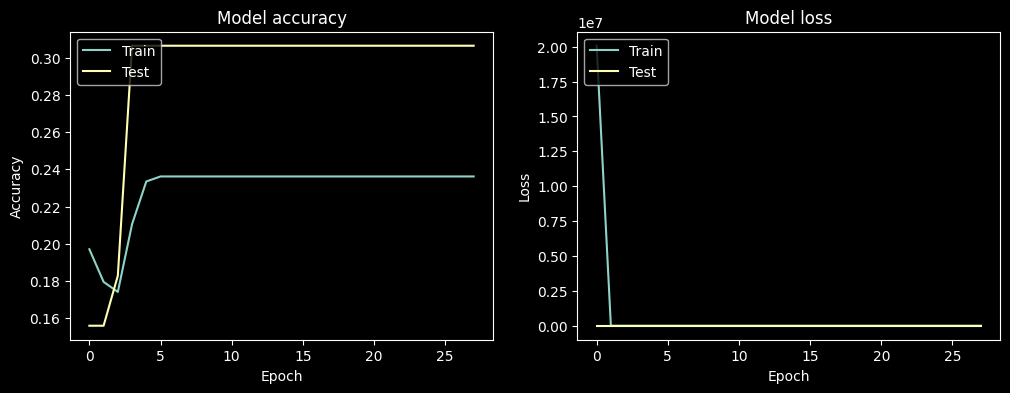

In [44]:
def plot_results(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.show()

plot_results(history)

In [ ]:
# Test 13/10 changement débruitage

In [86]:
model = create_model(NB_BREEDS)
history = model.fit(X_train, y_train_encoded, epochs=100, validation_data=(X_test, y_test_encoded), batch_size=32, callbacks=callbacks)

Epoch 1/100
24/24 [==============================] - ETA: 0s - loss: 229120.5625 - accuracy: 0.2159
Epoch 1: loss did not improve from 0.00226
24/24 [==============================] - 11s 454ms/step - loss: 229120.5625 - accuracy: 0.2159 - val_loss: 1.9225 - val_accuracy: 0.1559
Epoch 2/100
24/24 [==============================] - ETA: 0s - loss: 1.6429 - accuracy: 0.2051
Epoch 2: loss did not improve from 0.00226
24/24 [==============================] - 11s 456ms/step - loss: 1.6429 - accuracy: 0.2051 - val_loss: 1.6111 - val_accuracy: 0.1559
Epoch 3/100
24/24 [==============================] - ETA: 0s - loss: 1.6185 - accuracy: 0.2159
Epoch 3: loss did not improve from 0.00226
24/24 [==============================] - 11s 454ms/step - loss: 1.6185 - accuracy: 0.2159 - val_loss: 1.6190 - val_accuracy: 0.1828
Epoch 4/100
24/24 [==============================] - ETA: 0s - loss: 1.6190 - accuracy: 0.2267
Epoch 4: loss did not improve from 0.00226
24/24 [==============================] - 1

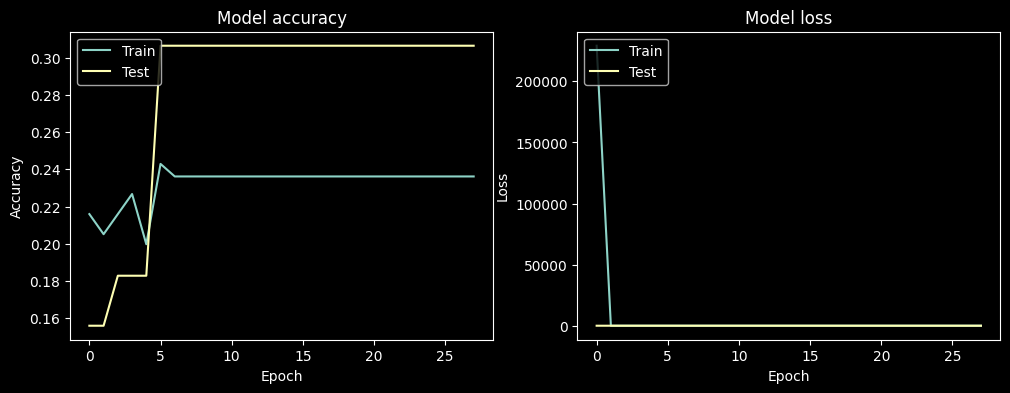

In [87]:
def plot_results(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.show()

plot_results(history)

In [ ]:
# Fin test

In [45]:
# Test

In [46]:
uri_list=ds_img.index.values[0:np.sum(df.nb_pic.values[0:NB_BREEDS])]
X = preprocessing(uri_list, (224,224))/255 # On divise par 255 pour faire une sorte de StandardScaler
y = ds_img.breed_name[0:np.sum(df.nb_pic.values[0:NB_BREEDS])]

# Convert data in numpy array
y = np.array(y)

# Dans un modèle CNN, les labels doivent être numériques. Il faut les encoder.
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

In [47]:
#Séparation jeux entraînement/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=42)

# Passage des X et y de int en categ
y_train_encoded = to_categorical(y_train, num_classes=NB_BREEDS)
y_test_encoded = to_categorical(y_test, num_classes=NB_BREEDS)

In [48]:
model = create_model(NB_BREEDS)
history = model.fit(X_train, y_train_encoded, epochs=100, validation_data=(X_test, y_test_encoded), batch_size=32, callbacks=callbacks)

Epoch 1/100
24/24 [==============================] - ETA: 0s - loss: 1.7161 - accuracy: 0.2389
Epoch 1: loss did not improve from 1.60501
24/24 [==============================] - 11s 434ms/step - loss: 1.7161 - accuracy: 0.2389 - val_loss: 1.5329 - val_accuracy: 0.3333
Epoch 2/100
24/24 [==============================] - ETA: 0s - loss: 1.5205 - accuracy: 0.3333
Epoch 2: loss improved from 1.60501 to 1.52048, saving model to Best_Model_1.h5
24/24 [==============================] - 12s 508ms/step - loss: 1.5205 - accuracy: 0.3333 - val_loss: 1.5113 - val_accuracy: 0.3441
Epoch 3/100


/Users/alexandremonod/Python/OC_ML/projet_6_classer_des_images/.venv/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


24/24 [==============================] - ETA: 0s - loss: 1.4694 - accuracy: 0.3711
Epoch 3: loss improved from 1.52048 to 1.46941, saving model to Best_Model_1.h5
24/24 [==============================] - 12s 507ms/step - loss: 1.4694 - accuracy: 0.3711 - val_loss: 1.6925 - val_accuracy: 0.2742
Epoch 4/100
24/24 [==============================] - ETA: 0s - loss: 1.4258 - accuracy: 0.4089
Epoch 4: loss improved from 1.46941 to 1.42583, saving model to Best_Model_1.h5
24/24 [==============================] - 12s 488ms/step - loss: 1.4258 - accuracy: 0.4089 - val_loss: 1.7061 - val_accuracy: 0.2312
Epoch 5/100
24/24 [==============================] - ETA: 0s - loss: 1.3884 - accuracy: 0.4184
Epoch 5: loss improved from 1.42583 to 1.38843, saving model to Best_Model_1.h5
24/24 [==============================] - 12s 511ms/step - loss: 1.3884 - accuracy: 0.4184 - val_loss: 1.8940 - val_accuracy: 0.2581
Epoch 6/100
24/24 [==============================] - ETA: 0s - loss: 1.3727 - accuracy: 0.4

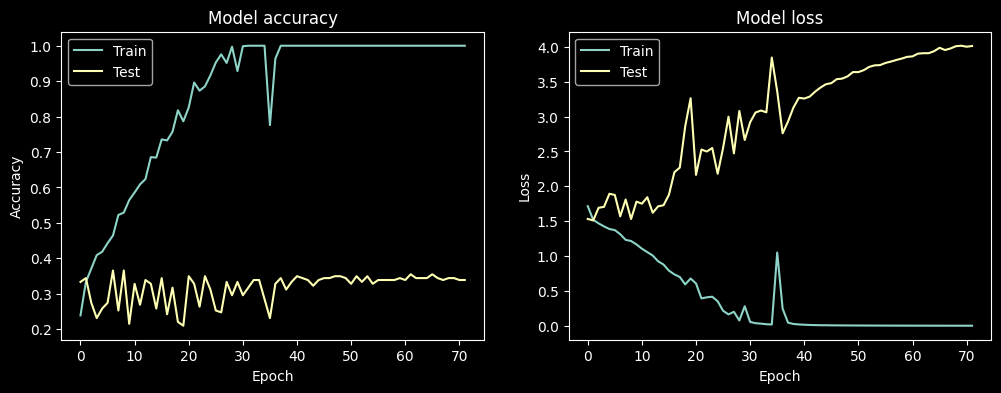

In [49]:
plot_results(history)

In [50]:
# Fin test

### Train-test sur 15 races

In [51]:
NB_BREEDS = 15

In [52]:
uri_list_2 =ds_img.index.values[0:np.sum(df.nb_pic.values[0:NB_BREEDS])]
X_2 = preprocessing(uri_list_2, (224,224))
y_2 = ds_img.breed_name[0:np.sum(df.nb_pic.values[0:NB_BREEDS])]

# Convert data in numpy array
y_2 = np.array(y_2)

# Dans un modèle CNN, les labels doivent être numériques. Il faut les encoder.
encoder_2 = LabelEncoder()
encoder_2.fit(y_2)
y_2 = encoder_2.transform(y_2)

In [53]:
#Séparation jeux entraînement/test
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2,shuffle=True, random_state=42)

# Passage des X et y de int en categ
y_train_encoded_2 = to_categorical(y_train_2, num_classes=NB_BREEDS)
y_test_encoded_2 = to_categorical(y_test_2, num_classes=NB_BREEDS)

In [54]:
model_2 = create_model(NB_BREEDS)
history_2 = model_2.fit(X_train_2, y_train_encoded_2, epochs=10, validation_data=(X_test_2, y_test_encoded_2))

Epoch 1/10
64/64 [==============================] - 28s 429ms/step - loss: 4266063508275200.0000 - accuracy: 0.0869 - val_loss: 2.7077 - val_accuracy: 0.0902
Epoch 2/10
64/64 [==============================] - 28s 443ms/step - loss: 2.7068 - accuracy: 0.0913 - val_loss: 2.7073 - val_accuracy: 0.0902
Epoch 3/10
64/64 [==============================] - 29s 452ms/step - loss: 2.7062 - accuracy: 0.0913 - val_loss: 2.7070 - val_accuracy: 0.0902
Epoch 4/10
64/64 [==============================] - 542s 9s/step - loss: 2.7056 - accuracy: 0.0913 - val_loss: 2.7067 - val_accuracy: 0.0902
Epoch 5/10
64/64 [==============================] - 35s 543ms/step - loss: 2.7050 - accuracy: 0.0913 - val_loss: 2.7065 - val_accuracy: 0.0902
Epoch 6/10
64/64 [==============================] - 30s 463ms/step - loss: 2.7044 - accuracy: 0.0913 - val_loss: 2.7063 - val_accuracy: 0.0902
Epoch 7/10
64/64 [==============================] - 38s 591ms/step - loss: 2.7040 - accuracy: 0.0913 - val_loss: 2.7061 - val_acc

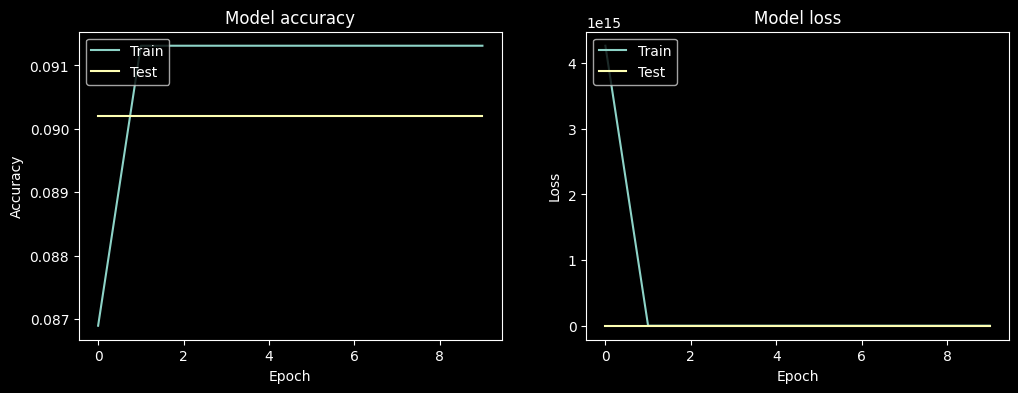

In [55]:
plot_results(history_2)

### Data Augmentation sur 5 races

In [56]:
NB_BREEDS = 5

In [57]:
uri_list_15_3 = ds_img.index.values[0:np.sum(df.nb_pic.values[0:NB_BREEDS])]
X_3 = preprocessing(uri_list_15_3, (224,224))
y_3 = ds_img.breed_name[0:np.sum(df.nb_pic.values[0:NB_BREEDS])]

# Convert data in numpy array
y_3 = np.array(y_3)

# Dans un modèle CNN, les labels doivent être numériques. Il faut les encoder.
encoder_3 = LabelEncoder()
encoder_3.fit(y_3)
y_3 = encoder_3.transform(y_3)

In [58]:
#Séparation jeux entraînement/test
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.2,shuffle=True, random_state=42)

# Passage des X et y de int en categ
y_train_encoded_3 = to_categorical(y_train_3, num_classes=NB_BREEDS)
y_test_encoded_3 = to_categorical(y_test_3, num_classes=NB_BREEDS)

Observer cb d'images sont créées ; comment le Data Augmentation se passe (transformationd es images existantes et/ou création de nouvelles)

In [59]:
model_3 = create_model(NB_BREEDS)

In [60]:
train_gen2 = datagen.flow(X_train_3, y_train_encoded_3, batch_size=32)

In [61]:
history_3 = model_3.fit(train_gen2, epochs=10, validation_data=(X_test_3, y_test_encoded_3))

Epoch 1/10
24/24 [==============================] - 14s 560ms/step - loss: 1.6462 - accuracy: 0.2227 - val_loss: 48.2539 - val_accuracy: 0.3280
Epoch 2/10
24/24 [==============================] - 13s 527ms/step - loss: 1.5898 - accuracy: 0.2443 - val_loss: 53.3322 - val_accuracy: 0.2688
Epoch 3/10
24/24 [==============================] - 13s 517ms/step - loss: 1.5648 - accuracy: 0.2780 - val_loss: 70.4022 - val_accuracy: 0.3065
Epoch 4/10
24/24 [==============================] - 12s 516ms/step - loss: 1.5542 - accuracy: 0.2713 - val_loss: 69.8969 - val_accuracy: 0.2796
Epoch 5/10
24/24 [==============================] - 13s 527ms/step - loss: 1.5556 - accuracy: 0.2645 - val_loss: 73.6669 - val_accuracy: 0.3011
Epoch 6/10
24/24 [==============================] - 12s 494ms/step - loss: 1.5474 - accuracy: 0.3050 - val_loss: 93.0379 - val_accuracy: 0.2742
Epoch 7/10
24/24 [==============================] - 12s 497ms/step - loss: 1.5489 - accuracy: 0.2996 - val_loss: 90.4004 - val_accuracy:

Impossible de savoir cb de fois le modèle va voir les images originales et cb de fois il va voir les images data augmentées.

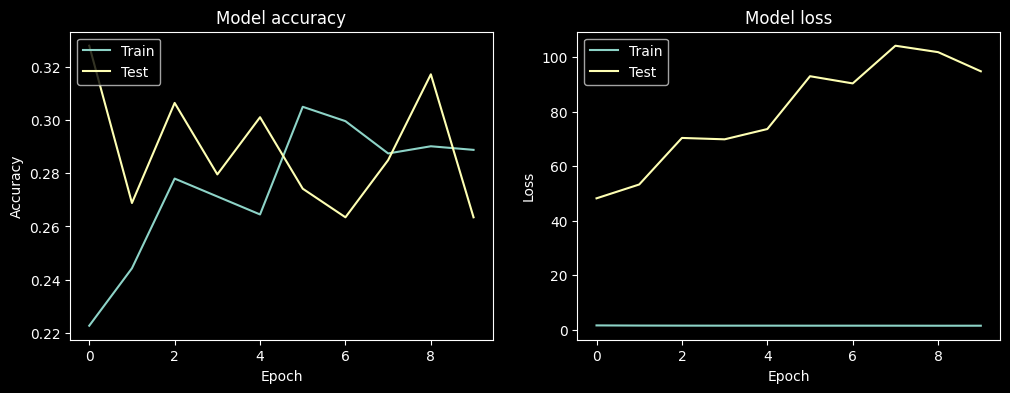

In [62]:
plot_results(history_3)

La Data Augmentation a-t-elle apporté une meilleure accuracy et un meilleur loss ?

In [63]:
# End code

Ces approches ont leurs limites : on teste donc le Transfer Learning

## 5. Transfer Learning

Documentation sur les différents modèles : https://keras.io/api/applications/xception/

### VGG16

Modèle facile à comprendre avec des couches similaires les unes aux autres.  
Inconvénients : lenteur et demande des ressources importantes.

In [64]:
import keras.applications

In [65]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, GlobalAveragePooling2D
#from scikeras.wrappers import KerasClassifier
from keras.applications.vgg16 import VGG16
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.optimizers import Adam

In [66]:
keras.applications.vgg16.preprocess_input

<function keras.src.applications.vgg16.preprocess_input(x, data_format=None)>

In [67]:
NB_BREEDS = 15
uri_list_vgg16 = ds_img.index.values[0:np.sum(df.nb_pic.values[0:NB_BREEDS])]

X_vgg16 = preprocessing(uri_list_vgg16, (224,224))
y_vgg16 = ds_img.breed_name[0:np.sum(df.nb_pic.values[0:NB_BREEDS])]

# Convert data in numpy array
y_vgg16 = np.array(y_vgg16)

# Dans un modèle CNN, les labels doivent être numériques. Il faut les encoder.
encoder_vgg16 = LabelEncoder()
encoder_vgg16.fit(y_vgg16)
y_vgg16 = encoder_vgg16.transform(y_vgg16)

#Séparation jeux entraînement/test
X_train_vgg16, X_test_vgg16, y_train_vgg16, y_test_vgg16 = train_test_split(X_vgg16, y_vgg16, test_size=0.2,shuffle=True, random_state=42)

# Passage des X et y de int en categ
y_train_encoded_vgg16 = to_categorical(y_train_vgg16, num_classes=NB_BREEDS)
y_test_encoded_vgg16 = to_categorical(y_test_vgg16, num_classes=NB_BREEDS)

In [68]:
model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))

In [69]:
#Define tf model with a new fully-connected layers
tf_model_vgg16 = Sequential()
tf_model_vgg16.add(model_vgg16)
tf_model_vgg16.add(GlobalAveragePooling2D())
tf_model_vgg16.add(Dense(512, activation='relu'))
tf_model_vgg16.add(Dropout(0.2))
tf_model_vgg16.add(Dense(NB_BREEDS, activation='softmax'))

# Compiles the model for training.
tf_model_vgg16.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [70]:
train_datagen_vgg16 = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2,
    preprocessing_function= keras.applications.vgg16.preprocess_input)

test_datagen_vgg16 = ImageDataGenerator(preprocessing_function=keras.applications.vgg16.preprocess_input)

In [71]:
result_cnn_vgg16 = tf_model_vgg16.fit(train_datagen_vgg16.flow(X_train_vgg16, y_train_vgg16, batch_size=16, subset='training'),
          validation_data=train_datagen_vgg16.flow(X_train_vgg16, y_train_vgg16, batch_size=16, subset='validation'),
          steps_per_epoch=len(X_train_vgg16) / 32, epochs=30, verbose=2)

Epoch 1/30
63/63 - 366s - loss: 5.2744 - accuracy: 0.0742 - val_loss: 2.7058 - val_accuracy: 0.1302 - 366s/epoch - 6s/step
Epoch 2/30
63/63 - 383s - loss: 2.7077 - accuracy: 0.0830 - val_loss: 2.6977 - val_accuracy: 0.1302 - 383s/epoch - 6s/step
Epoch 3/30


KeyboardInterrupt: 

result_cnn_vgg16_2 = tf_model_vgg16.fit(train_datagen_vgg16.flow(X_train_vgg16, y_train_encoded_vgg16, batch_size=16, subset='training'),
          validation_data=train_datagen_vgg16.flow(X_train_vgg16, y_train_encoded_vgg16, batch_size=16, subset='validation'),
          steps_per_epoch=len(X_train_vgg16) / 32, epochs=30, verbose=2)

In [ ]:
# prediction
y_pred_vgg16 = np.argmax(tf_model_vgg16.predict(test_datagen_vgg16.flow(X_test, y_test, batch_size=16,shuffle=False), verbose=1), axis=1)

12/12 [==============================] - 19s 2s/step


In [ ]:
# Test Daouda

In [ ]:
NB_BREEDS = 15
uri_list_vgg16_2 = ds_img.index.values[0:np.sum(df.nb_pic.values[0:NB_BREEDS])]

X_vgg16_2 = preprocessing2(uri_list_vgg16_2, (224,224))
y_vgg16_2 = ds_img.breed_name[0:np.sum(df.nb_pic.values[0:NB_BREEDS])]

# Convert data in numpy array
y_vgg16_2 = np.array(y_vgg16_2)

# Dans un modèle CNN, les labels doivent être numériques. Il faut les encoder.
encoder_vgg16_2 = LabelEncoder()
encoder_vgg16_2.fit(y_vgg16_2)
y_vgg16_2 = encoder_vgg16.transform(y_vgg16_2)

#Séparation jeux entraînement/test
X_train_vgg16_2, X_test_vgg16_2, y_train_vgg16_2, y_test_vgg16_2 = train_test_split(X_vgg16_2, y_vgg16_2, test_size=0.2,shuffle=True, random_state=42)

# Passage des X et y de int en categ
y_train_encoded_vgg16_2 = to_categorical(y_train_vgg16_2, num_classes=NB_BREEDS)
y_test_encoded_vgg16_2 = to_categorical(y_test_vgg16_2, num_classes=NB_BREEDS)

In [ ]:
model_vgg16_2 = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))

In [ ]:
#Define tf model with a new fully-connected layers
tf_model_vgg16_2 = Sequential()
tf_model_vgg16_2.add(model_vgg16_2)
tf_model_vgg16_2.add(GlobalAveragePooling2D())
tf_model_vgg16_2.add(Dense(512, activation='relu'))
tf_model_vgg16_2.add(Dropout(0.2))
tf_model_vgg16_2.add(Dense(NB_BREEDS, activation='softmax'))

# Compiles the model for training.
tf_model_vgg16_2.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
train_datagen_vgg16_2 = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2,
    preprocessing_function= keras.applications.vgg16.preprocess_input)

test_datagen_vgg16_2 = ImageDataGenerator(preprocessing_function=keras.applications.vgg16.preprocess_input)

In [ ]:
result_cnn_vgg16_2 = tf_model_vgg16.fit(train_datagen_vgg16_2.flow(X_train_vgg16_2, y_train_vgg16_2, batch_size=16, subset='training'),
          validation_data=train_datagen_vgg16.flow(X_train_vgg16_2, y_train_vgg16_2, batch_size=16, subset='validation'),
          steps_per_epoch=len(X_train_vgg16_2) / 32, epochs=30, verbose=2)

Epoch 1/30
63/63 - 369s - loss: 2.7052 - accuracy: 0.0812 - val_loss: 2.6955 - val_accuracy: 0.1302 - 369s/epoch - 6s/step
Epoch 2/30
63/63 - 372s - loss: 2.7020 - accuracy: 0.0812 - val_loss: 2.6954 - val_accuracy: 0.1302 - 372s/epoch - 6s/step
Epoch 3/30
63/63 - 375s - loss: 2.7001 - accuracy: 0.0791 - val_loss: 2.6955 - val_accuracy: 0.1302 - 375s/epoch - 6s/step
Epoch 4/30
63/63 - 375s - loss: 2.7042 - accuracy: 0.0685 - val_loss: 2.6963 - val_accuracy: 0.0590 - 375s/epoch - 6s/step
Epoch 5/30
63/63 - 378s - loss: 2.7036 - accuracy: 0.0822 - val_loss: 2.6971 - val_accuracy: 0.0590 - 378s/epoch - 6s/step
Epoch 6/30
63/63 - 379s - loss: 2.7023 - accuracy: 0.0675 - val_loss: 2.6958 - val_accuracy: 0.1302 - 379s/epoch - 6s/step
Epoch 7/30
63/63 - 378s - loss: 2.6979 - accuracy: 0.0920 - val_loss: 2.6936 - val_accuracy: 0.1302 - 378s/epoch - 6s/step
Epoch 8/30
63/63 - 384s - loss: 2.6991 - accuracy: 0.0851 - val_loss: 2.6923 - val_accuracy: 0.1302 - 384s/epoch - 6s/step
Epoch 9/30
63/63

result_cnn_vgg16_2 = tf_model_vgg16.fit(train_datagen_vgg16.flow(X_train_vgg16, y_train_encoded_vgg16, batch_size=16, subset='training'),
          validation_data=train_datagen_vgg16.flow(X_train_vgg16, y_train_encoded_vgg16, batch_size=16, subset='validation'),
          steps_per_epoch=len(X_train_vgg16) / 32, epochs=30, verbose=2)

In [ ]:
# prediction
y_pred_vgg16_2 = np.argmax(tf_model_vgg16_2.predict(test_datagen_vgg16_2.flow(X_test_vgg16_2, y_test_vgg16_2, batch_size=16,shuffle=False), verbose=1), axis=1)

32/32 [==============================] - 51s 2s/step


In [ ]:
# Fin test Daouda

In [ ]:
y_train_encoded_vgg16.shape

(2037, 15)

### Inception

L'intérêt du Inception est d'éviter le pb de disparition du gradient, commun dans le cas de réseau neurones profonds.  
Il capture des détails à différentes échelles.  
Inconvénient : demande un peu plus de temps de calcul.  
L'input size par défaut de ResNet est 224*224.

In [ ]:
from keras.applications.inception_v3 import InceptionV3, preprocess_input as inception_preprocess_input

In [ ]:
NB_BREEDS = 15
uri_list_inception = ds_img.index.values[0:np.sum(df.nb_pic.values[0:NB_BREEDS])]

X_inception = preprocessing(uri_list_inception, (224,224))
y_inception = ds_img.breed_name[0:np.sum(df.nb_pic.values[0:NB_BREEDS])]

# Convert data in numpy array
y_inception = np.array(y_inception)

# Dans un modèle CNN, les labels doivent être numériques. Il faut les encoder.
encoder_inception = LabelEncoder()
encoder_inception.fit(y_inception)
y_inception = encoder_inception.transform(y_inception)

#Séparation jeux entraînement/test
X_train_inception, X_test_inception, y_train_inception, y_test_inception = train_test_split(X_inception, y_inception, test_size=0.2,shuffle=True, random_state=42)

# Passage des X et y de int en categ
y_train_encoded_inception = to_categorical(y_train_inception, num_classes=NB_BREEDS)
y_test_encoded_inception = to_categorical(y_test_inception, num_classes=NB_BREEDS)

In [ ]:
model_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(224,224,3))

In [ ]:
#Define tf model with a new fully-connected layers
tf_model_inception = Sequential()
tf_model_inception.add(model_inception)
tf_model_inception.add(GlobalAveragePooling2D())
tf_model_inception.add(Dense(512, activation='relu'))
tf_model_inception.add(Dropout(0.2))
tf_model_inception.add(Dense(NB_BREEDS, activation='softmax'))

# Compiles the model for training.
tf_model_inception.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
train_datagen_inception = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2,
    preprocessing_function= inception_preprocess_input)

test_datagen_inception = ImageDataGenerator(preprocessing_function=inception_preprocess_input)

In [ ]:
result_cnn_inception = tf_model_inception.fit(train_datagen_inception.flow(X_train, y_train, batch_size=16, subset='training'),
          validation_data=train_datagen_inception.flow(X_train, y_train, batch_size=16, subset='validation'),
          steps_per_epoch=len(X_train) / 32, epochs=30, verbose=2)

Epoch 1/30
23/23 - 37s - loss: 1.9976 - accuracy: 0.2839 - val_loss: 13.8239 - val_accuracy: 0.2095 - 37s/epoch - 2s/step
Epoch 2/30
23/23 - 35s - loss: 1.5248 - accuracy: 0.3906 - val_loss: 20.3622 - val_accuracy: 0.2095 - 35s/epoch - 2s/step
Epoch 3/30
23/23 - 33s - loss: 1.3622 - accuracy: 0.4557 - val_loss: 1.9744 - val_accuracy: 0.1757 - 33s/epoch - 1s/step
Epoch 4/30
23/23 - 32s - loss: 1.3781 - accuracy: 0.4634 - val_loss: 1.6536 - val_accuracy: 0.2027 - 32s/epoch - 1s/step
Epoch 5/30
23/23 - 32s - loss: 1.2684 - accuracy: 0.5176 - val_loss: 1.8527 - val_accuracy: 0.2095 - 32s/epoch - 1s/step
Epoch 6/30
23/23 - 33s - loss: 1.1729 - accuracy: 0.5703 - val_loss: 1.9180 - val_accuracy: 0.2095 - 33s/epoch - 1s/step
Epoch 7/30
23/23 - 33s - loss: 1.0669 - accuracy: 0.5908 - val_loss: 1.8012 - val_accuracy: 0.2095 - 33s/epoch - 1s/step
Epoch 8/30
23/23 - 32s - loss: 1.1920 - accuracy: 0.5528 - val_loss: 1.7130 - val_accuracy: 0.2095 - 32s/epoch - 1s/step
Epoch 9/30
23/23 - 32s - loss:

Beaucoup de surapprentissage  
C'est quand l'accuracy est égale à la val accuracy : ça veut dire que l'accuracy du train - l'accuracy du test

In [ ]:
# En mettant les bons X Train_inception ...

result_cnn_inception = tf_model_inception.fit(train_datagen_inception.flow(X_train_inception, y_train_inception, batch_size=16, subset='training'),
          validation_data=train_datagen_inception.flow(X_train_inception, y_train_inception, batch_size=16, subset='validation'),
          steps_per_epoch=len(X_train_inception) / 32, epochs=30, verbose=2)

Epoch 1/30
63/63 - 96s - loss: 3.0756 - accuracy: 0.0986 - val_loss: 3.9864 - val_accuracy: 0.0860 - 96s/epoch - 2s/step
Epoch 2/30
63/63 - 90s - loss: 2.6965 - accuracy: 0.0988 - val_loss: 2.6939 - val_accuracy: 0.1499 - 90s/epoch - 1s/step
Epoch 3/30
63/63 - 90s - loss: 2.6747 - accuracy: 0.0978 - val_loss: 2.6981 - val_accuracy: 0.1351 - 90s/epoch - 1s/step
Epoch 4/30
63/63 - 91s - loss: 2.6567 - accuracy: 0.1016 - val_loss: 2.7007 - val_accuracy: 0.1302 - 91s/epoch - 1s/step
Epoch 5/30
63/63 - 92s - loss: 2.5994 - accuracy: 0.1184 - val_loss: 2.6338 - val_accuracy: 0.0860 - 92s/epoch - 1s/step
Epoch 6/30
63/63 - 93s - loss: 2.5567 - accuracy: 0.1357 - val_loss: 2.6608 - val_accuracy: 0.1179 - 93s/epoch - 1s/step
Epoch 7/30
63/63 - 90s - loss: 2.5023 - accuracy: 0.1507 - val_loss: 2.5506 - val_accuracy: 0.1572 - 90s/epoch - 1s/step
Epoch 8/30
63/63 - 90s - loss: 2.4670 - accuracy: 0.1624 - val_loss: 2.6481 - val_accuracy: 0.1548 - 90s/epoch - 1s/step
Epoch 9/30
63/63 - 91s - loss: 2

In [ ]:
result_cnn_inception_2 = tf_model_inception.fit(train_datagen_inception.flow(X_train_inception, y_train_encoded_inception, batch_size=16, subset='training'),
          validation_data=train_datagen_inception.flow(X_train_inception, y_train_encoded_inception, batch_size=16, subset='validation'),
          steps_per_epoch=len(X_train_inception) / 32, epochs=30, verbose=2)

Epoch 1/30


InvalidArgumentError: Graph execution error:

Detected at node 'Squeeze' defined at (most recent call last):
    File "/opt/homebrew/Cellar/python@3.10/3.10.6_2/Frameworks/Python.framework/Versions/3.10/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/opt/homebrew/Cellar/python@3.10/3.10.6_2/Frameworks/Python.framework/Versions/3.10/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/Users/alexandremonod/Python/OC_ML/projet_6_classer_des_images/.venv/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/alexandremonod/Python/OC_ML/projet_6_classer_des_images/.venv/lib/python3.10/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/Users/alexandremonod/Python/OC_ML/projet_6_classer_des_images/.venv/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 728, in start
      self.io_loop.start()
    File "/Users/alexandremonod/Python/OC_ML/projet_6_classer_des_images/.venv/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/opt/homebrew/Cellar/python@3.10/3.10.6_2/Frameworks/Python.framework/Versions/3.10/lib/python3.10/asyncio/base_events.py", line 600, in run_forever
      self._run_once()
    File "/opt/homebrew/Cellar/python@3.10/3.10.6_2/Frameworks/Python.framework/Versions/3.10/lib/python3.10/asyncio/base_events.py", line 1896, in _run_once
      handle._run()
    File "/opt/homebrew/Cellar/python@3.10/3.10.6_2/Frameworks/Python.framework/Versions/3.10/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/alexandremonod/Python/OC_ML/projet_6_classer_des_images/.venv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "/Users/alexandremonod/Python/OC_ML/projet_6_classer_des_images/.venv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "/Users/alexandremonod/Python/OC_ML/projet_6_classer_des_images/.venv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 409, in dispatch_shell
      await result
    File "/Users/alexandremonod/Python/OC_ML/projet_6_classer_des_images/.venv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/Users/alexandremonod/Python/OC_ML/projet_6_classer_des_images/.venv/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/Users/alexandremonod/Python/OC_ML/projet_6_classer_des_images/.venv/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/alexandremonod/Python/OC_ML/projet_6_classer_des_images/.venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "/Users/alexandremonod/Python/OC_ML/projet_6_classer_des_images/.venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "/Users/alexandremonod/Python/OC_ML/projet_6_classer_des_images/.venv/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/alexandremonod/Python/OC_ML/projet_6_classer_des_images/.venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/alexandremonod/Python/OC_ML/projet_6_classer_des_images/.venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/alexandremonod/Python/OC_ML/projet_6_classer_des_images/.venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/z3/8962l16x2hbb_4qm7s2df7gc0000gn/T/ipykernel_694/3765837328.py", line 1, in <module>
      result_cnn_inception_2 = tf_model_inception.fit(train_datagen_inception.flow(X_train_inception, y_train_encoded_inception, batch_size=16, subset='training'),
    File "/Users/alexandremonod/Python/OC_ML/projet_6_classer_des_images/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/alexandremonod/Python/OC_ML/projet_6_classer_des_images/.venv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1742, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/alexandremonod/Python/OC_ML/projet_6_classer_des_images/.venv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1338, in train_function
      return step_function(self, iterator)
    File "/Users/alexandremonod/Python/OC_ML/projet_6_classer_des_images/.venv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1322, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/alexandremonod/Python/OC_ML/projet_6_classer_des_images/.venv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1303, in run_step
      outputs = model.train_step(data)
    File "/Users/alexandremonod/Python/OC_ML/projet_6_classer_des_images/.venv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1085, in train_step
      return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/Users/alexandremonod/Python/OC_ML/projet_6_classer_des_images/.venv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1179, in compute_metrics
      self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/Users/alexandremonod/Python/OC_ML/projet_6_classer_des_images/.venv/lib/python3.10/site-packages/keras/src/engine/compile_utils.py", line 605, in update_state
      metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "/Users/alexandremonod/Python/OC_ML/projet_6_classer_des_images/.venv/lib/python3.10/site-packages/keras/src/utils/metrics_utils.py", line 77, in decorated
      update_op = update_state_fn(*args, **kwargs)
    File "/Users/alexandremonod/Python/OC_ML/projet_6_classer_des_images/.venv/lib/python3.10/site-packages/keras/src/metrics/base_metric.py", line 140, in update_state_fn
      return ag_update_state(*args, **kwargs)
    File "/Users/alexandremonod/Python/OC_ML/projet_6_classer_des_images/.venv/lib/python3.10/site-packages/keras/src/metrics/base_metric.py", line 723, in update_state
      matches = ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/alexandremonod/Python/OC_ML/projet_6_classer_des_images/.venv/lib/python3.10/site-packages/keras/src/metrics/accuracy_metrics.py", line 459, in sparse_categorical_accuracy
      matches = metrics_utils.sparse_categorical_matches(y_true, y_pred)
    File "/Users/alexandremonod/Python/OC_ML/projet_6_classer_des_images/.venv/lib/python3.10/site-packages/keras/src/utils/metrics_utils.py", line 960, in sparse_categorical_matches
      y_true = tf.squeeze(y_true, [-1])
Node: 'Squeeze'
Can not squeeze dim[1], expected a dimension of 1, got 15
	 [[{{node Squeeze}}]] [Op:__inference_train_function_91556]

In [ ]:
# prediction
y_pred_inception = np.argmax(tf_model_inception.predict(test_datagen_inception.flow(X_test, y_test, batch_size=16,shuffle=False), verbose=1), axis=1)

12/12 [==============================] - 7s 480ms/step


In [ ]:
y_train_encoded_inception.shape

(2244, 15)

In [ ]:
# Preprocessing
X_inception = preprocessing(uri_list_vgg16, (299, 299))  # Seul changement
y_vgg16 = ds_img.breed_name[0:np.sum(df.nb_pic.values[0:NB_BREEDS])]


y_inception = ds_img.breed_name[0:np.sum(df.nb_pic.values[0:NB_BREEDS])]
y_inception = np.array(y_inception)
encoder_inception = LabelEncoder()
encoder_inception.fit(y_inception)
y_inception = encoder_inception.transform(y_inception)
X_train_inception, X_test_inception, y_train_inception, y_test_inception = train_test_split(X_inception, y_inception, test_size=0.2,shuffle=True, random_state=42)
y_train_encoded_inception = to_categorical(y_train_inception, num_classes=NB_BREEDS)
y_test_encoded_inception = to_categorical(y_test_inception, num_classes=NB_BREEDS)

In [ ]:
train_datagen_inception = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2,
    preprocessing_function=inception_preprocess_input)

In [ ]:
test_datagen_inception = ImageDataGenerator(preprocessing_function=inception_preprocess_input)

train_gen_inception = train_datagen_inception.flow(X_train_inception, y_train_encoded_inception, batch_size=32, subset="training")
validation_inception = train_datagen_inception.flow(X_train_inception, y_train_encoded_inception, batch_size=32, subset='validation')

In [ ]:
# Construction du modèle

model_inception = InceptionV3(include_top=False, input_shape=(299, 299, 3))

model_incep = Sequential()
model_incep.add(model_inception)
model_incep.add(Flatten())
model_incep.add(Dense(NB_BREEDS, activation='softmax'))

87910968/87910968 [==============================] - 4s 0us/step


In [ ]:
model_incep.compile(optimizer=Adam(learning_rate=0.0001), 
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
result_incep = model_incep.fit(train_gen_inception,
          validation_data=validation_inception,
          steps_per_epoch=math.ceil(len(X_train_inception) / 32), epochs=30, verbose=2);

Epoch 1/30


64/64 - 289s - loss: 2.4654 - accuracy: 0.3264 - val_loss: 1.9080 - val_accuracy: 0.4398 - 289s/epoch - 5s/step


### ResNet 50

L'intérêt du ResNet est d'éviter le pb de disparition du gradient, commun dans le cas de réseau neurones profonds.  
Il peut "sauter" des connexions entre certains neurones, ce qui lui fait éviter le pb de disparition du gradient
L'input size par défaut de ResNet est 224*224.

In [ ]:
from keras.applications.resnet50 import ResNet50, preprocess_input as resnet_preprocess_input

In [ ]:
# Preprocessing
X_resnet = preprocessing(uri_list_vgg16, (224, 224))

y_resnet = ds_img.breed_name[0:np.sum(df.nb_pic.values[0:NB_BREEDS])]
y_resnet = np.array(y_resnet)
encoder_resnet = LabelEncoder()
encoder_resnet.fit(y_resnet)
y_resnet = encoder_resnet.transform(y_resnet)
X_train_resnet, X_test_resnet, y_train_resnet, y_test_resnet = train_test_split(X_resnet, y_resnet, test_size=0.2,shuffle=True, random_state=42)
y_train_encoded_resnet = to_categorical(y_train_resnet, num_classes=NB_BREEDS)
y_test_encoded_resnet = to_categorical(y_test_resnet, num_classes=NB_BREEDS)

In [ ]:
train_datagen_resnet = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2,
    preprocessing_function=resnet_preprocess_input)

In [ ]:
test_datagen_resnet = ImageDataGenerator(preprocessing_function=resnet_preprocess_input)

train_gen_resnet = train_datagen_resnet.flow(X_train_resnet, y_train_encoded_resnet, batch_size=32, subset="training")
validation_resnet = train_datagen_resnet.flow(X_train_resnet, y_train_encoded_resnet, batch_size=32, subset='validation')

In [ ]:
model_resnet = ResNet50(include_top=False, input_shape=(224, 224, 3))

model_res = Sequential()
model_res.add(model_resnet)
model_res.add(Flatten())
model_res.add(Dense(NB_BREEDS, activation='softmax'))

model_res.compile(optimizer=Adam(learning_rate=0.0001), 
                loss='categorical_crossentropy',
                metrics=['accuracy'])

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
result_res = model_res.fit(train_gen_resnet,
          validation_data=validation_resnet,
          steps_per_epoch=math.ceil(len(X_train_resnet) / 32), epochs=30, verbose=2)

Epoch 1/30


64/64 - 255s - loss: 3.5948 - accuracy: 0.2239 - val_loss: 3.6042 - val_accuracy: 0.2752 - 255s/epoch - 4s/step


In [ ]:
# DAOUDA : LE RANDOMIZEDSEARCH NE PEUT PAR MARCHER ??

__Pour faire tout cela, je crée une fonction avec les couches du modèle, et je lui passe les paramètres avec un RandomizedSearch.__

Keras Tuner

In [ ]:
# Fonction pour créer le modèle, nécessaire pour KerasClassifier
def create_model(optimizer='adam', activation='relu', nb_filters=32, kernel_size=3):
    model = Sequential()
    model.add(Conv2D(nb_filters, kernel_size=(kernel_size, kernel_size), activation=activation, input_shape=(64, 64, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation=activation))
    model.add(Dense(len(list_breeds), activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Créer le modèle avec KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# Définir les paramètres de la grille de recherche
optimizer = ['SGD', 'Adam']
activation = ['relu', 'tanh', 'sigmoid']
nb_filters = [32, 64, 128]
kernel_size = [3, 5]
epochs = [10, 20, 30]

param_grid = dict(optimizer=optimizer, activation=activation, nb_filters=nb_filters, kernel_size=kernel_size, epochs=epochs)

grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs=-1, cv=3, scoring=['accuracy', 'neg_log_loss'], refit='accuracy')

In [ ]:
# ECHEC DU RANDOMIZEDSEARCH

# Fonction pour créer le modèle, nécessaire pour KerasClassifier
def create_model_func(nb_filters, kernel_size):
    def create_model(optimizer='adam', activation='relu'):
        model = Sequential()
        model.add(Conv2D(nb_filters, kernel_size=(kernel_size, kernel_size), activation=activation, input_shape=(64, 64, 3)))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Flatten())
        model.add(Dense(128, activation=activation))
        model.add(Dense(len(list_breeds), activation='softmax'))
        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
        return model
    return create_model


# Créer le modèle avec KerasClassifier
model = KerasClassifier(build_fn=create_model_func(32,3), verbose=0)

# Définir les paramètres de la grille de recherche
optimizer = ['SGD', 'Adam']
activation = ['relu', 'tanh', 'sigmoid']
nb_filters = [32, 64, 128]
kernel_size = [3, 5]
epochs = [10, 20, 30]

param_grid = dict(optimizer=optimizer, activation=activation, nb_filters=nb_filters, kernel_size=kernel_size, epochs=epochs)

grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs=-1, cv=3, scoring=['accuracy', 'neg_log_loss'], refit='accuracy')

# Exécuter la recherche sur grille
grid_result = grid.fit(X_train, y_train)

# Résumer les résultats
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

ValueError: Invalid parameter nb_filters for estimator KerasClassifier.
This issue can likely be resolved by setting this parameter in the KerasClassifier constructor:
`KerasClassifier(nb_filters=64)`
Check the list of available parameters with `estimator.get_params().keys()`